In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
#Read file and display first five contents

data=pd.read_csv("C:/Users/Don Augwin/Downloads/vgsales.csv")
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
#Description of dataset in terms of mean,median,mode, standard deviation,quartiles,max,min for all the columns


data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [4]:
X=data.groupby('Genre').size()
print(X)

Genre
Action          3316
Adventure       1286
Fighting         848
Misc            1739
Platform         886
Puzzle           582
Racing          1249
Role-Playing    1488
Shooter         1310
Simulation       867
Sports          2346
Strategy         681
dtype: int64


From this table we can find the respective genre count of the games given in the dataset. Action games are the highest followed by Sports and Miscellaneous 

In [5]:
y=data.groupby('Publisher').size()
print(y)

Publisher
10TACLE Studios                  3
1C Company                       3
20th Century Fox Video Games     5
2D Boy                           1
3DO                             36
                                ..
id Software                      1
imageepoch Inc.                  2
inXile Entertainment             1
mixi, Inc                        1
responDESIGN                     2
Length: 578, dtype: int64


In [6]:
data=data.dropna()
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [7]:
#The maximum values of each columns

data.apply(np.max)

Rank                                   16600
Name            ¡Shin Chan Flipa en colores!
Platform                                XOne
Year                                  2020.0
Genre                               Strategy
Publisher                       responDESIGN
NA_Sales                               41.49
EU_Sales                               29.02
JP_Sales                               10.22
Other_Sales                            10.57
Global_Sales                           82.74
dtype: object

The maximum sales value of respective region is given above.  The dataset has 16600 rows with the latest data in the dataset is found to be from the year 2020

<AxesSubplot:xlabel='Genre'>

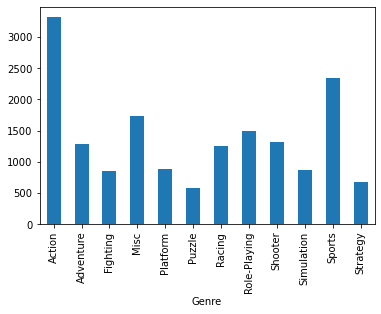

In [8]:


X.plot(kind='bar')

In [9]:
platform_df = pd.DataFrame(data['Platform'].value_counts()).reset_index()
platform_df.columns = ['Platform', 'counts']

In [10]:
platform_df.head()

,Platform,counts
0,DS,2131
1,PS2,2127
2,PS3,1304
3,Wii,1290
4,X360,1234


<AxesSubplot:xlabel='Platform', ylabel='counts'>

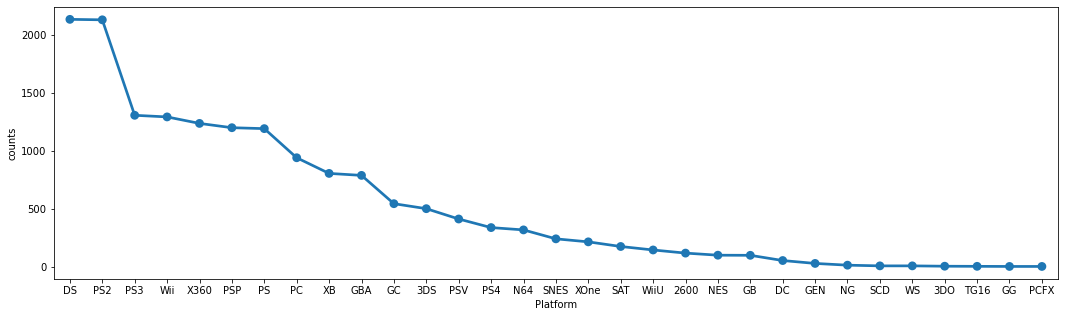

In [11]:
plt.figure(figsize=(18,5))
sns.pointplot(x='Platform', y='counts', data=platform_df)

In [12]:
publisher_df = pd.DataFrame(data['Publisher'].value_counts()).reset_index()
publisher_df.columns = ['Publisher', 'counts']
pd=publisher_df.head(10)

<AxesSubplot:xlabel='Publisher', ylabel='counts'>

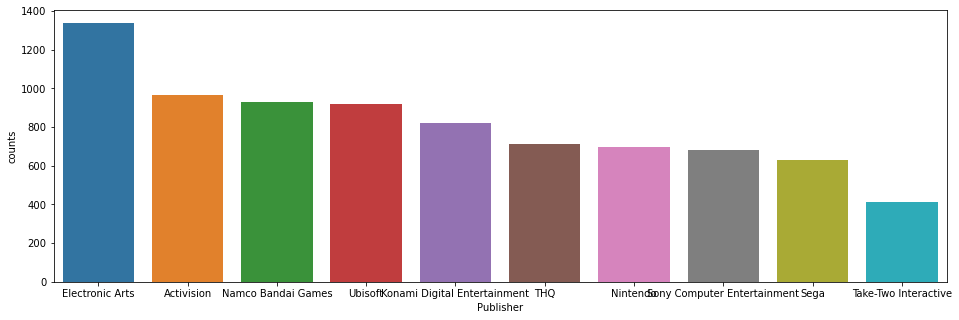

In [13]:
#Top 10 most game producing publishers over year


plt.figure(figsize=(16,5))
sns.barplot(x='Publisher', y='counts', data=pd)

In [14]:
bs=data[['Genre','Global_Sales']]
bs.head()

,Genre,Global_Sales
0,Sports,82.74
1,Platform,40.24
2,Racing,35.82
3,Sports,33.00
4,Role-Playing,31.37


In [15]:
#global sales of Sports, Action, Adventure, Shooter and Role-playing

sports = bs.loc[bs['Genre'] == 'Sports', 'Global_Sales'].sum()
action = bs.loc[bs['Genre'] == 'Action', 'Global_Sales'].sum()
adv=bs.loc[bs['Genre'] == 'Adventure', 'Global_Sales'].sum()
shooter=bs.loc[bs['Genre'] == 'Shooter', 'Global_Sales'].sum()
rp=bs.loc[bs['Genre'] == 'Role-Playing', 'Global_Sales'].sum()

print('The global sales of best selling genres are given:')

print('sports=',sports)
print('action=', action)
print('adventure', adv)
print('shooter', shooter)
print('Role Playing', rp)



The global sales of best selling genres are given:
sports= 1309.2400000000002
action= 1722.84
adventure 234.59
shooter 1026.2
Role Playing 923.83


In [16]:
# From the above evaluation is clear that action games are most loved than sports games and adventure games combined.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


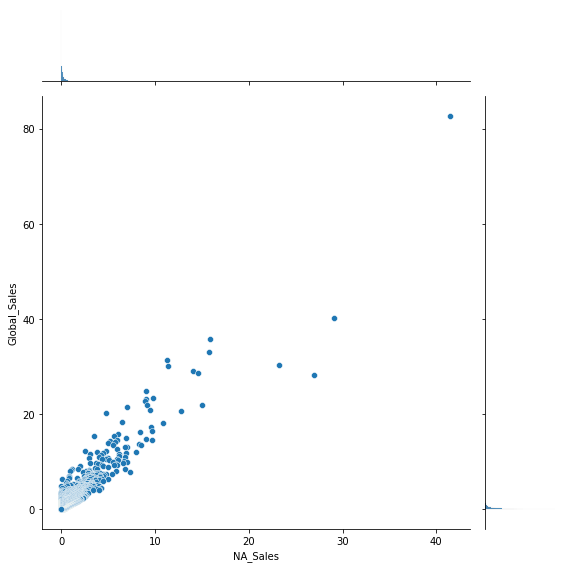

In [17]:
sns.jointplot(x='NA_Sales', y='Global_Sales', data=data, size=8)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


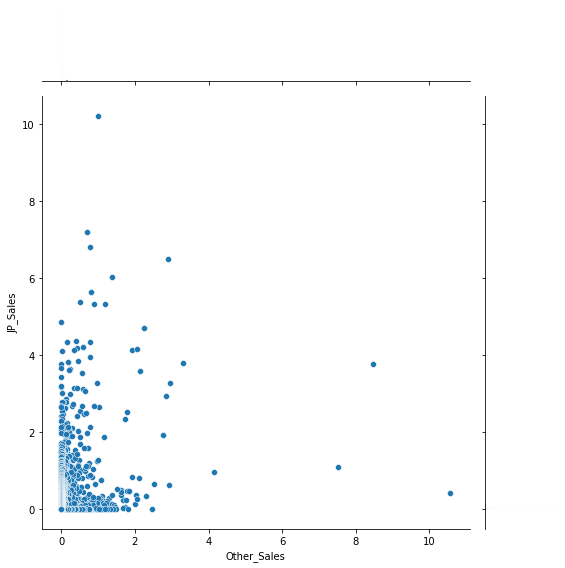

In [18]:
sns.jointplot(x='Other_Sales', y='JP_Sales', data=data, size=8)

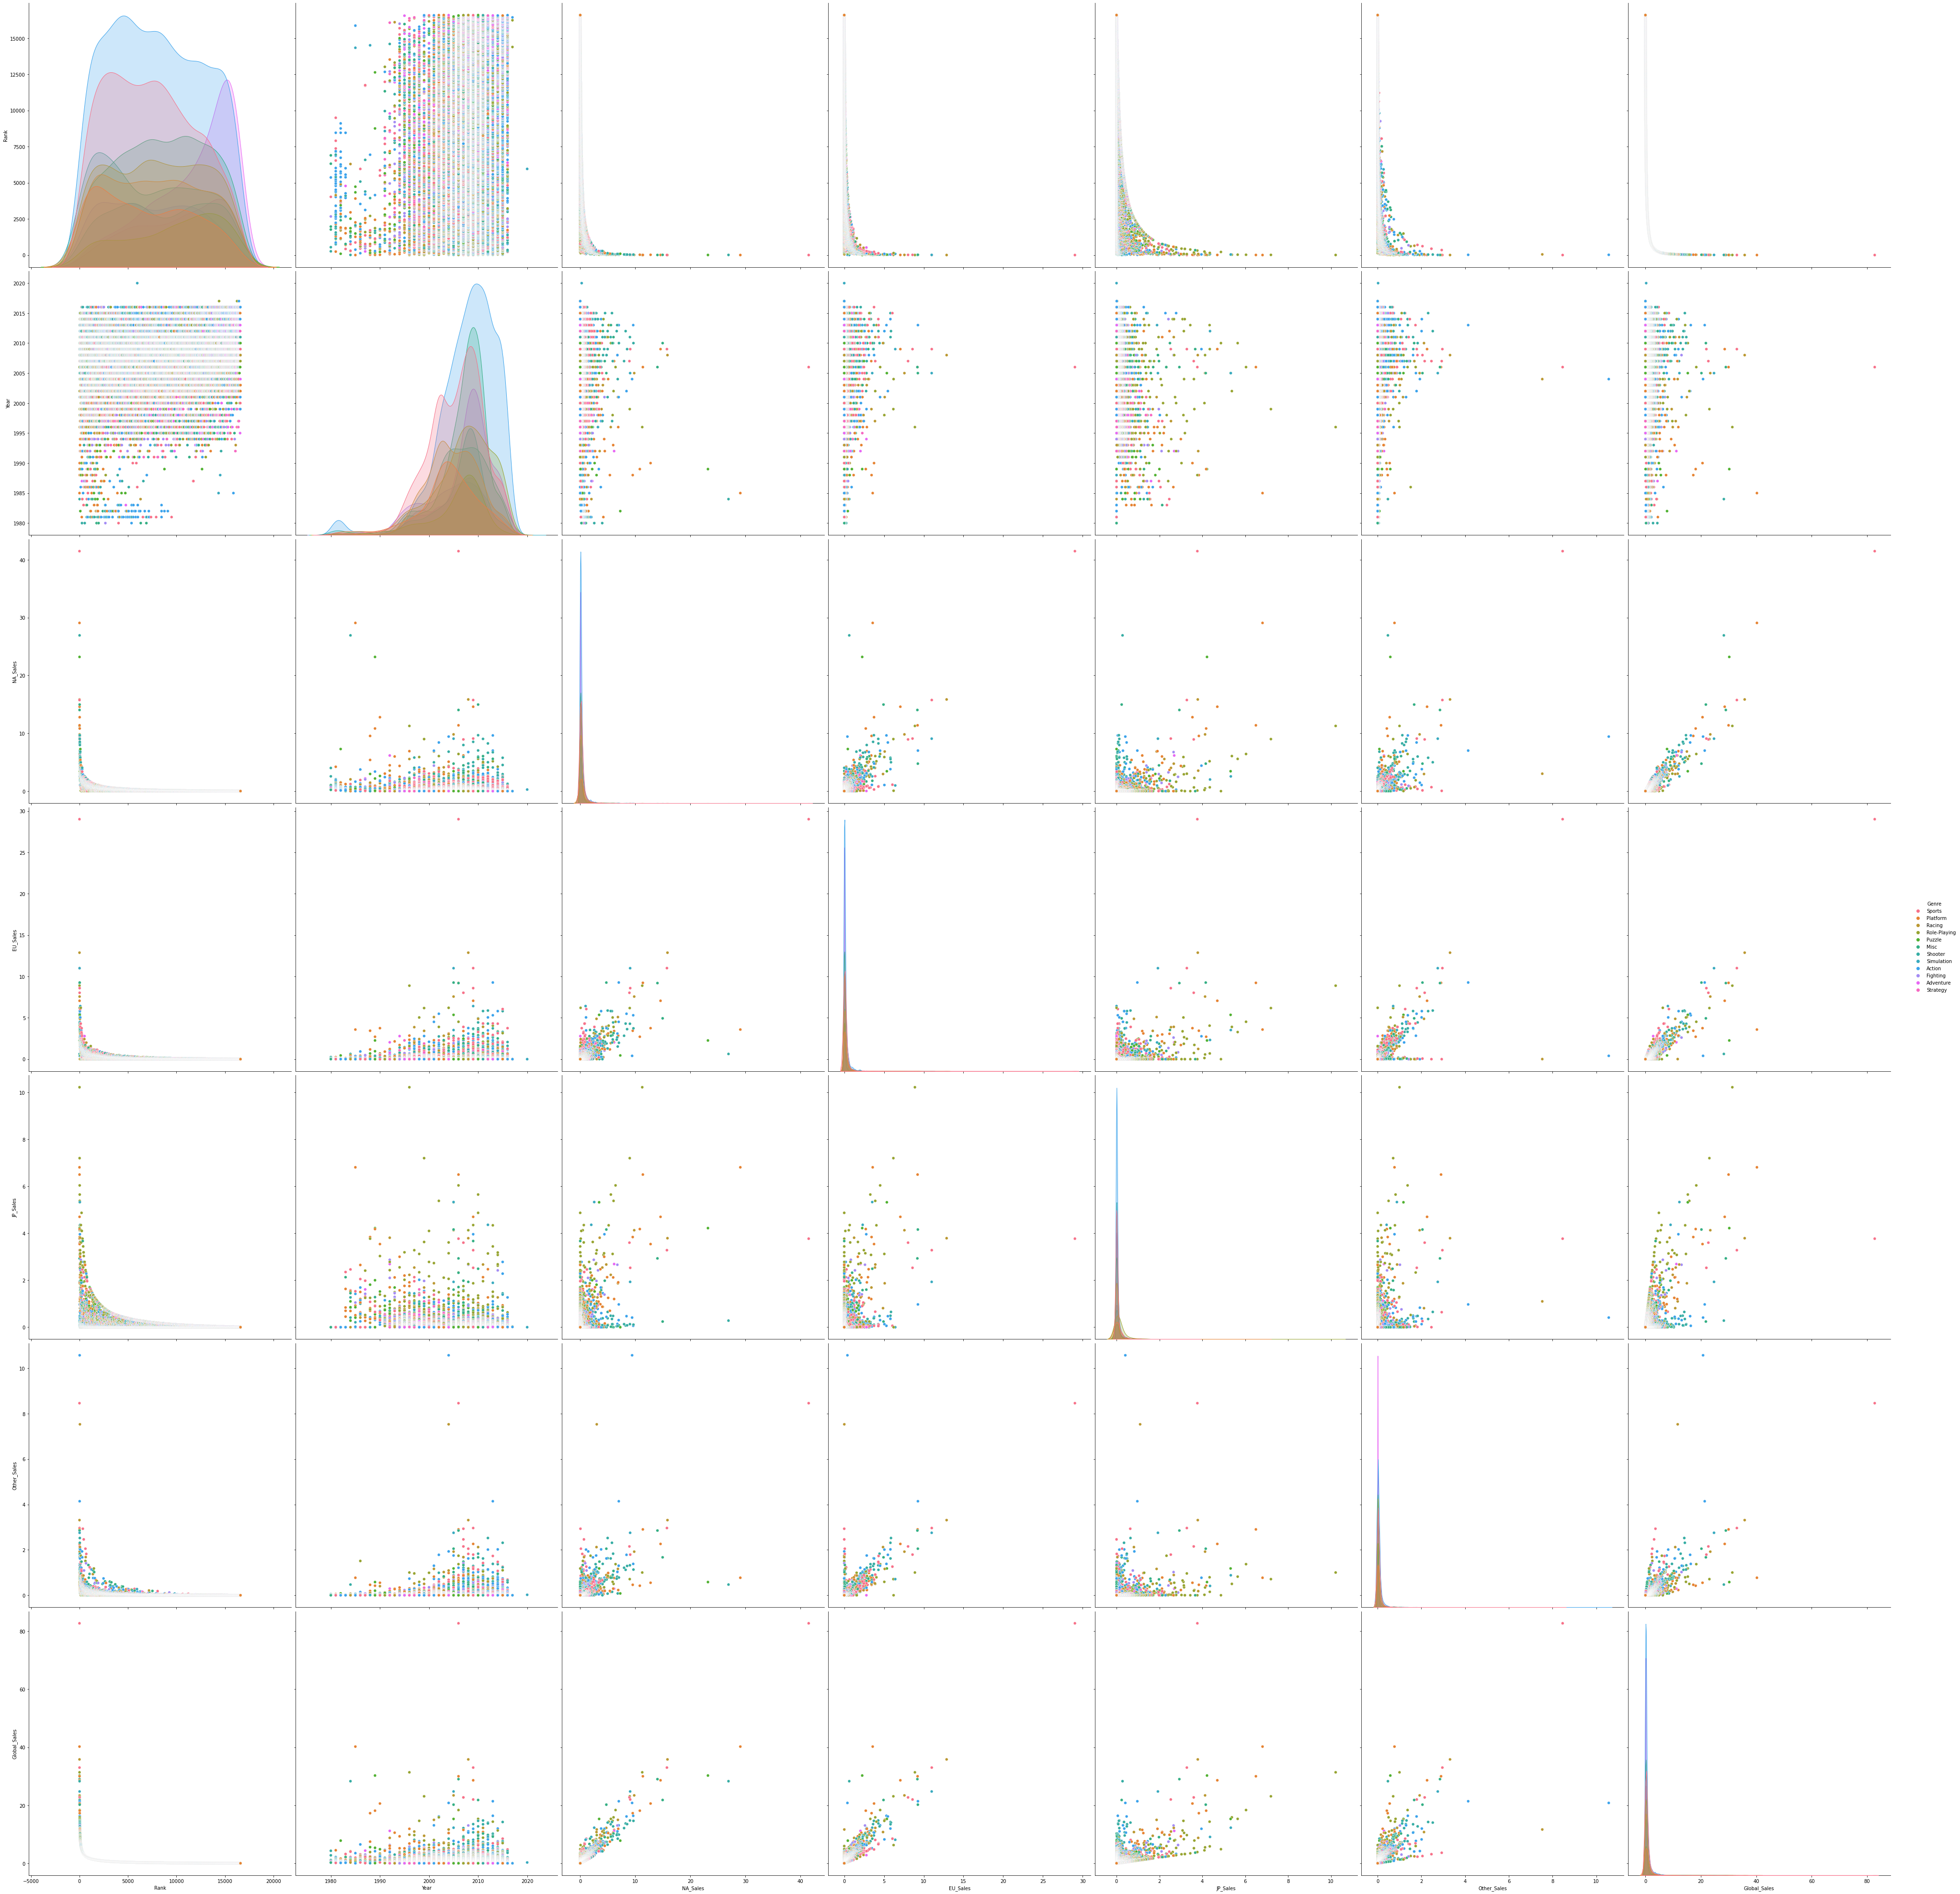

In [19]:
sns.pairplot(data, hue="Genre", height=8)

In [20]:
cols = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
df_four = data[cols]

# calculate correlation matrix
corr_matrix = df_four.corr()

# display correlation matrix
print(corr_matrix)

             NA_Sales  EU_Sales  JP_Sales  Other_Sales
NA_Sales     1.000000  0.768923  0.451283     0.634518
EU_Sales     0.768923  1.000000  0.436379     0.726256
JP_Sales     0.451283  0.436379  1.000000     0.290559
Other_Sales  0.634518  0.726256  0.290559     1.000000


In [21]:
# create new DataFrame with Genre='Sports'
df_sports = data[data['Genre'] == 'Sports']

# display new DataFrame
df_sports.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
13,14,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
14,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49


In [22]:
df_sports=df_sports.drop(['Genre','Platform','Year','Name'],axis=1)

In [34]:
X=df1.groupby('Publisher').size()
print(X)

Publisher
0       6
1       1
2      27
3       1
4       9
       ..
158     1
159    16
160     4
161     3
162     2
Length: 163, dtype: int64


In [ ]:
#There are 163 different publishers who publish these video games.

In [31]:
#The below classification is done for Sports Genre games

# Load the dataset
df1 = df_sports



In [26]:
# Preprocess the data
le = LabelEncoder()
df1['Publisher'] = le.fit_transform(df1['Publisher'])

ohe = OneHotEncoder()
X = ohe.fit_transform(df1['Publisher'].values.reshape(-1,1)).toarray()
y = df1['Publisher']



In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [28]:
# Apply logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)
print("Logistic regression score:", lr_score)



Logistic regression score: 0.9457700650759219


In [29]:
# Apply SVM
svm = SVC()
svm.fit(X_train, y_train)
svm_score = svm.score(X_test, y_test)
print("SVM score:", svm_score)



SVM score: 0.9761388286334056


In [30]:
# Apply naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_score = nb.score(X_test, y_test)
print("Naive Bayes score:", nb_score)


Naive Bayes score: 0.9761388286334056


In [32]:
#Classification for Action Genre games

In [33]:
df2=data[data['Genre'] == 'Action']

# display new DataFrame
df2.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
24,25,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
38,39,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10


In [37]:
Z=df2.groupby('Publisher').size()
print(Z)

Publisher
20th Century Fox Video Games     4
3DO                             17
505 Games                       21
5pb                              5
989 Studios                      2
                                ..
Zoo Digital Publishing           8
Zoo Games                        3
Zushi Games                      1
dramatic create                  1
mixi, Inc                        1
Length: 228, dtype: int64


In [38]:
#There are 228 publishers who publish these games

In [41]:
# Preprocess the data
le = LabelEncoder()
df2['Publisher'] = le.fit_transform(df2['Publisher'])

ohe = OneHotEncoder()
a = ohe.fit_transform(df2['Publisher'].values.reshape(-1,1)).toarray()
b = df2['Publisher']

C:\Users\DONAUG~1\AppData\Local\Temp/ipykernel_15048/1775162838.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Publisher'] = le.fit_transform(df2['Publisher'])


In [42]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(a, b, test_size=0.25, random_state=43)


In [43]:
# Apply logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)
print("Logistic regression score:", lr_score)


Logistic regression score: 0.939729397293973


In [44]:
# Apply SVM
svm = SVC()
svm.fit(X_train, y_train)
svm_score = svm.score(X_test, y_test)
print("SVM score:", svm_score)

SVM score: 0.965559655596556


In [45]:
# Apply naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_score = nb.score(X_test, y_test)
print("Naive Bayes score:", nb_score)


Naive Bayes score: 0.965559655596556


#Regardless of the genre for classifying the precictors, It is good to use SVM and Naive Bayes model as the number of best selling games are not in high numbers every year.

In [47]:
#Binary to predict whether they belong to Action or Sports Genre

In [52]:
# Filter data by genre
bi = data[data['Genre'].isin(['Sports', 'Action'])]

# Display filtered DataFrame
bi.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
13,14,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
14,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40


In [53]:
# Create binary column based on Genre values
bi['binary_column'] = bi['Genre'].apply(lambda x: 1 if x == 'Action' else 0)

# Display first few rows of DataFrame with new column
bi.head()


C:\Users\DONAUG~1\AppData\Local\Temp/ipykernel_15048/4106185103.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bi['binary_column'] = bi['Genre'].apply(lambda x: 1 if x == 'Action' else 0)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,binary_column
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,0
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,0
13,14,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72,0
14,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00,0
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40,1


In [55]:
# select the features and target
X = bi[["Rank", "Global_Sales"]]
y = bi["binary_column"]

In [59]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)


In [60]:
# fit a decision tree classifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# fit a logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression()

In [61]:
# evaluate the accuracy of the decision tree classifier
tree_pred = tree.predict(X_test)
tree_acc = accuracy_score(y_test, tree_pred)
print("Decision Tree Accuracy:", tree_acc)

# evaluate the accuracy of the logistic regression model
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_acc)


Decision Tree Accuracy: 0.5391539153915391
Logistic Regression Accuracy: 0.5625562556255626


#When we use Rank and Global sales to predict the Genre, it is not a good idea even though it gives a fair accuracy model while predicting the genre of the best selling video games.  So it would be good to find another method to find the pattern for the genre which drags the most attention from the youth